<a href="https://colab.research.google.com/github/HazenDeveloper/Attn-CNN-Model/blob/main/CNN_FE_SVM_RF-LungsCancer-featureMap-00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!pip install imutils
import keras
import tensorflow as tf

import os
from keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Input
from keras.layers import BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.utils import shuffle
from cv2 import imread
import numpy as np
import pandas as pd


In [3]:
from pandas.core.api import unique
from os import listdir, walk
from os.path import isfile, join
import cv2
from google.colab.patches import cv2_imshow
from imutils import paths

path = list(paths.list_images('/content/drive/MyDrive/ML-Datasets/Messidore/Messidor_dataset_without_clahe'))
labs = [i.split(os.path.sep)[-2] for i in path]

print(labs)
# print('testing', imagePaths[1].split(os.path.sep)[-2])

# img = cv2.imread(imagePaths[2])
# cv2_imshow(img)



['severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe', 'severe',

In [4]:

width,height=256,256
depth = 3
input_shape = (height, width, depth)

classes = 4

imagePaths = list(paths.list_images('/content/drive/MyDrive/ML-Datasets/Messidore/Messidor_dataset_without_clahe'))

# train_data_dir = '/content/drive/MyDrive/ML-Datasets/LungsCancer/Normal'
# test_data_dir = '/content/drive/MyDrive/ML-Datasets/LungsCancer/Bengin'
# valid_data_dir = '/content/drive/MyDrive/ML-Datasets/LungsCancer/Malignant'

data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)
print(len(data), len(labels))

from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# le = LabelEncoder()
# labels = le.fit_transform(labels)

# ohe = OneHotEncoder()
# labels = ohe.fit_transform(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

#labels = to_categorical(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

1200 1200
(1200, 256, 256, 3)
(1200, 4)


In [5]:
test_ratio = 0.2
# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=test_ratio, stratify=labels)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (960, 256, 256, 3)
Test images: (240, 256, 256, 3)
Train label: (960, 4)
Test label: (240, 4)


In [ ]:
xx_train, x_valid, yy_train, y_valid = train_test_split(x_train, y_train,test_size=test_ratio)

In [ ]:
print("Train images:",x_train.shape)
print("Test images:",x_valid.shape)
print("Train label:",y_train.shape)
print("Test label:",y_valid.shape)

Train images: (768, 256, 256, 3)
Test images: (192, 256, 256, 3)
Train label: (768, 4)
Test label: (192, 4)


In [ ]:
(x_train.shape[0])

768

In [56]:
def MiniVGGNet(width, heigth, depth, classes):
	model = Sequential()
	input_shape = (heigth, width, depth)
	chanDim = -1

	if keras.backend.image_data_format() == "channel_first":
		input_shape = (depth, heigth, width)
		chanDim = 1

	model.add(Conv2D(8,(3,3), padding="same", input_shape=input_shape, activation="relu"))
	# model.add(BatchNormalization(axis=chanDim))
	# model.add(Conv2D(32,(3,3), padding="same", input_shape=input_shape, activation="relu"))
	# model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2,2), strides=2))
	# model.add(Dropout(0.25))

	# model.add(Conv2D(64,(3,3), padding="same", input_shape=input_shape, activation="relu"))
	# model.add(BatchNormalization(axis=chanDim))
	model.add(Conv2D(16,(3,3), padding="same", activation="relu"))
	# model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2,2),strides=2))
	model.add(Dropout(0.25))

	model.add(Conv2D(32,(3,3), padding="same", activation="relu"))
	# model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2,2), strides=2))
	# model.add(Dropout(0.25))

	model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
	# model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2,2), strides=2))
	model.add(Dropout(0.25))


	model.add(BatchNormalization())
	model.add(Flatten())
	model.add(Dense(4096))
	# model.add(Dense(1024))
	model.add(Dense(1024, activation="relu"))
	# model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(classes, activation="softmax"))

	return model

In [57]:
#!pip install scikit-plot
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
# import scikitplot as skplt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics
import tensorflow

# cnn_model = tensorflow.keras.models.load_model('best_model.h5')
# x_test = test_generator
# x_train = train_generator
# y_test = test_generator.classes
def plot_results(h):
  # plot the training loss and accuracy
  N = len(h.epoch)
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, N), h.history["loss"], label="train_loss")
  # plt.plot(np.arange(0, N), h.history["val_loss"], label="val_loss")
  # plt.title("Training Loss vs. validation Loss")
  # plt.xlabel("Epoch #")
  # plt.ylabel("Loss")
  # plt.legend(loc="lower left")
  # plt.show()

  # plt.figure()
  plt.plot(np.arange(0, N), h.history["accuracy"], label="train_acc")
  # plt.plot(np.arange(0, N), h.history["val_accuracy"], label="val_acc")
  # plt.title("Training Accuracy vs. Validation Accuracy")
  # plt.xlabel("Epoch #")
  # plt.ylabel("Loss/Accuracy")
  plt.legend(loc="lower left")
  plt.show()

def evaluate_kth_fold(x_train, x_test, y_train, y_test):
  print("[INFO] evaluating network...")
  predIdxs = cnn_model.predict(x_test, batch_size=BS)
  predIdxs = np.argmax(predIdxs, axis=1)

  trainpredIdxs = cnn_model.predict(x_train, batch_size=BS)
  trainpredIdxs = np.argmax(trainpredIdxs, axis=1)

  trainCNNScore=accuracy_score(trainpredIdxs,y_train.argmax(axis=1))*100
  CNNScore=accuracy_score(predIdxs,y_test.argmax(axis=1))*100

  return trainCNNScore, CNNScore

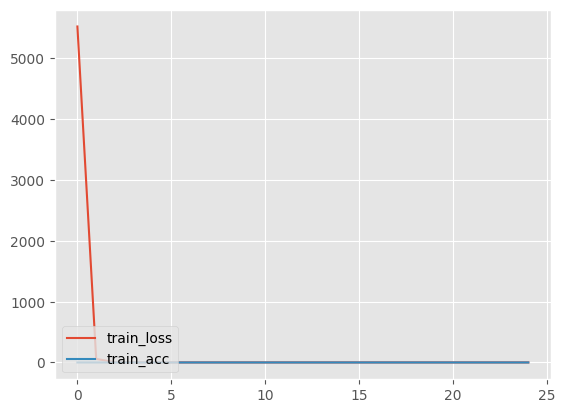

In [ ]:
plot_results(h)

In [58]:
# Specify the path where you want to save the best model
checkpoint_path = 'best_model.h5'
from keras.callbacks import EarlyStopping

# Create the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    patience = 2,
    monitor='accuracy',       # Metric to monitor (could also be 'val_accuracy', etc.)
    save_best_only=True,      # Saves only the best model based on the monitored metric
    # save_weights_only=False,  # Set to True to save only the model's weights, not the whole model
    verbose=1                 # Verbosity level: 0 - silent, 1 - progress bar, 2 - one line per epoch.
)
# checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping_callback = EarlyStopping(monitor='accuracy', patience=10, mode='max', restore_best_weights=True)
my_callbacks = [model_checkpoint, early_stopping_callback]

In [59]:
INIT_LR = 0.001
opt = Adam(learning_rate=INIT_LR)
epochs = 100
BS=64

cnn_model = MiniVGGNet(width, height, depth, classes)
# cnn_model = MiniVGGNet(cnn_model)
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])#, run_eagerly=True)
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 64, 64, 16)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 64, 64, 32)       

In [60]:
# Training
h = cnn_model.fit(x_train, y_train, epochs=epochs, batch_size=BS, callbacks=my_callbacks)
print("Done !!")

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 29.0995 - accuracy: 0.2969
Epoch 1: accuracy improved from -inf to 0.29688, saving model to best_model.h5
15/15 [==============================] - 9s 464ms/step - loss: 29.0995 - accuracy: 0.2969
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 2.2956 - accuracy: 0.3792
Epoch 2: accuracy improved from 0.29688 to 0.37917, saving model to best_model.h5
15/15 [==============================] - 10s 674ms/step - loss: 2.2956 - accuracy: 0.3792
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 1.3593 - accuracy: 0.4281
Epoch 3: accuracy improved from 0.37917 to 0.42812, saving model to best_model.h5
15/15 [==============================] - 10s 701ms/step - loss: 1.3593 - accuracy: 0.4281
Epoch 4/100
15/15 [==============================] - ETA: 0s - loss: 1.3456 - accuracy: 0.4260
Epoch 4: accuracy did not improve from 0.42812
15/15 [==============================] - 1s 85ms/step - los

In [ ]:
path

In [48]:
import tensorflow as tf

from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
# model = VGG16()
# filename='/content/drive/MyDrive/ML-Datasets/Messidore/Messidor_dataset_without_clahe/normal/20051205_60119_0400_PP.tif.png'
def feature_map_visuals(model, filename, idxLayer):
    target_size=(256,256)
    print(model)
    # redefine model to output right after the first hidden layer
    model = Model(inputs=model.inputs, outputs=model.layers[idxLayer].output)
    # model.summary()
    # load the image with the required shape
    img = load_img(filename, target_size=target_size)
    # convert the image to an array
    img = img_to_array(img)
    # expand dimensions so that it represents a single 'sample'
    img = expand_dims(img, axis=0)
    # prepare the image (e.g. scale pixel values for the vgg)
    # img = preprocess_input(img)
    # get feature map for first hidden layer
    feature_maps = model.predict(img)
    # plot all 64 maps in an 8x8 squares
    square = 4
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
            ix += 1
        # show the figure
        pyplot.show()


/content/drive/MyDrive/ML-Datasets/Messidore/Messidor_dataset_without_clahe/severe/20051020_53178_0100_PP.tif.png
1/1 [==============================] - 0s 209ms/step


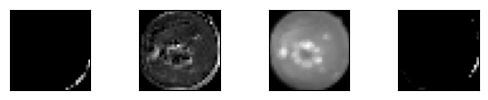

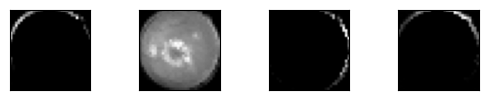

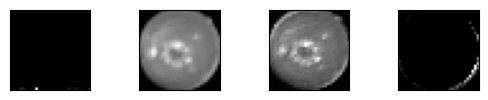

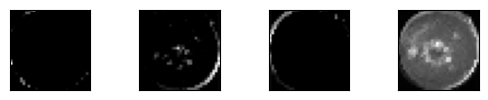

In [65]:
print(path[20])
filename = path[20]
feature_map_visuals(cnn_model, filename, 6)

[INFO] evaluating network...
15/15 [==============================] - 1s 54ms/step

Trainig Accuracy Score:- 45.520833333333336

Testing Accuracy Score:- 45.416666666666664

Traning Graph:- 
 


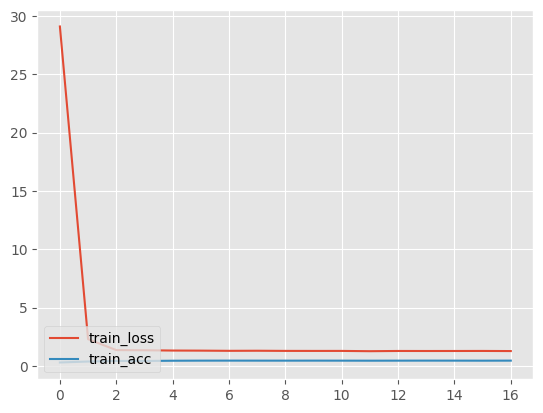

In [68]:
trainCNNScore, CNNScore = evaluate_kth_fold(x_train, x_test, y_train, y_test)

print("\nTrainig Accuracy Score:-",trainCNNScore)
print("\nTesting Accuracy Score:-",CNNScore)
print("\nTraning Graph:- \n ")

plot_results(h)

In [ ]:
width,height=256,256
depth = 3
input_shape = (height, width, depth)

classes = 4
depth = 3
INIT_LR = 1e-3
EPOCHS = 100
BS=32

from keras.optimizers import Nadam, SGD, Adam
from sklearn.model_selection import StratifiedKFold

h = []
Kfold = StratifiedKFold(n_splits=8)
for train, test in Kfold.split(x_train, y_train.argmax(axis=1)):
  cnn_model = Sequential()
  # opt = Nadam(learning_rate=INIT_LR)
  # opt = adam_v1(learning_rate=INIT_LR)
  opt = Adam(learning_rate=INIT_LR)

  # cnn_model = MiniVGGNet(width, height, depth, classes)
  cnn_model = MiniVGGNetv01(cnn_model)
  cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])#, run_eagerly=True)
  # cnn_model.summary()
  h = cnn_model.fit(x_train[train], y_train[train], epochs=EPOCHS, batch_size=BS, callbacks=my_callbacks)
  print("Done !!")

  trainCNNScore, CNNScore = evaluate_kth_fold(x_train[train], x_test, y_train[train], y_test)

  print("\nTrainig Accuracy Score:-",trainCNNScore)
  print("\nTesting Accuracy Score:-",CNNScore)
  print("\nTraning Graph:- \n ")

plot_results(h)

  # cnn_model = MiniVGGNetv01(model)
# opt = gradient_descent_legacy.SGD (learning_rate = INIT_LR)
# cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)
# cnn_model.summary()

Epoch 1/100
27/27 [==============================] - ETA: 0s - loss: 2706.5725 - accuracy: 0.3456
Epoch 1: accuracy improved from -inf to 0.34556, saving model to best_model.h5


KeyError: ignored

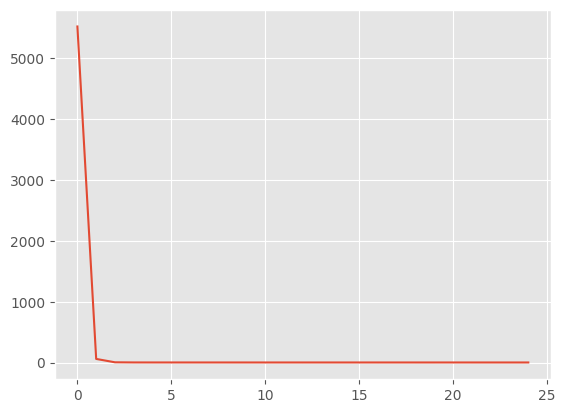

In [ ]:
plot_results(h)

In [66]:
!pip install scikit-plot

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
extractCNN = Model(cnn_model.inputs, cnn_model.layers[2].output)

#del(data)
#del(labels)
feat_trainCNN  = extractCNN.predict(x_train)
feat_testCNN = extractCNN.predict(x_test)

print(feat_trainCNN.shape)

30/30 [==============================] - 1s 24ms/step


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainSVMScoreCNN=svm.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("SVM Training Accuracy Score:-",TrainSVMScoreCNN)

TestSVMScoreCNN=svm.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nSVM Testing Accuracy Score:-",TestSVMScoreCNN)

SVM Training Accuracy Score:- 100.0

SVM Testing Accuracy Score:- 98.18181818181819


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainDecisionScoreCNN=clf.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("Decision Tree Training Accuracy Score:-",TrainDecisionScoreCNN)


TestDecisionScoreCNN=clf.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nDecision Tree Testing Accuracy Score:-",TestDecisionScoreCNN)

Decision Tree Training Accuracy Score:- 100.0

Decision Tree Testing Accuracy Score:- 89.54545454545455


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainKNNScoreCNN=knn.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("KNN Training Accuracy Score:-",TrainKNNScoreCNN)

TestKNNScoreCNN=knn.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nKNN Testing Accuracy Score:-",TestKNNScoreCNN)

KNN Training Accuracy Score:- 98.51767388825542

KNN Testing Accuracy Score:- 97.27272727272728


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainNBScoreCNN=gnb.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("\nGaussianNaive Bayes Training Accuracy Score:-",TrainNBScoreCNN)

TestNBScoreCNN=gnb.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nGaussianNaive Bayes Testing Accuracy Score:-",TestNBScoreCNN)


GaussianNaive Bayes Training Accuracy Score:- 82.09806157354618

GaussianNaive Bayes Testing Accuracy Score:- 69.54545454545455
